<a href="https://colab.research.google.com/github/ramism16/opencv-image-processing/blob/master/RamisMustafa_224248_DIPLab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing modules and mounting google drive

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.morphology import diamond

### Structuring elements (kernels) of different sizes


In [0]:
"""
    cv2 getStructuringElement() can generate kernels of structuring elements
        cv2.MORPH_RECT = rectangle
        cv2.MORPH_ELLIPSE = ellipse
        cv2.MORPH_CROSS = cross (x)

"""
#arrays to store kernels of size 3x3,4x4,5x5
rectangleKernels = []
ellipseKernels = []
crossKernels = []

for i in [2,3,4,5]:
    #rectangle structuring elements
    rectangleKernels.append( cv2.getStructuringElement( cv2.MORPH_RECT, (i,i)) )
    #ellipse structuring elements
    ellipseKernels.append( cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i)) )
    #cross structuring elements
    crossKernels.append( cv2.getStructuringElement(cv2.MORPH_CROSS, (i,i)) )

print("Rectangle kernel 4x4:\n", np.matrix(rectangleKernels[1]))
print("\nEllipse kernel 4x4:\n", np.matrix(ellipseKernels[1]))
print("\nCross Kernel 4x4:\n", np.matrix(crossKernels[1]))

#the kernel arrays are data type = uint8

Rectangle kernel 4x4:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]

Ellipse kernel 4x4:
 [[0 1 0]
 [1 1 1]
 [0 1 0]]

Cross Kernel 4x4:
 [[0 1 0]
 [1 1 1]
 [0 1 0]]



# 1: Morphology to remove noise from fingerprint image

## Reading the original image

Fingerprint image:



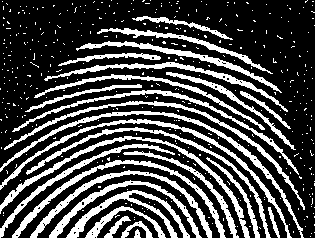

In [0]:
fingerprint = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 10/Lab 10_BSCS7AB/fp.tif", 0)
print("Fingerprint image:\n")
cv2_imshow(fingerprint)

## Applying erosion on the fingerprint image

In [0]:
"""
    The objective of the morphological operation is to remove noise from the data
    that is at the foreground of the image

    The function to be used here:
    cv2.erode(img, kernel, iterations)
    
    For the above fingerprint image with rounded boundaries, ellipse and cross
    seem to be suitable structuring elements. I will test both with different kernel sizes

    I will store the results of operations with multiple sizes and choose the best
"""

#arrays to store the results with kernels of different size
erosionsFPEllipse = []
erosionsFPCross = []

#performing and storing the results of erosion
for i in range(4):
    erosionsFPEllipse.append( cv2.erode(fingerprint, ellipseKernels[i], iterations = 1) )
    erosionsFPCross.append( cv2.erode(fingerprint, crossKernels[i], iterations = 1) )

print("results stored")

results stored


## Diplaying the results and choosing the best


Ellipse #1 :



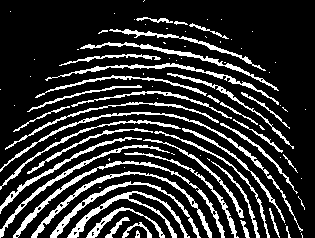


Cross #1 :



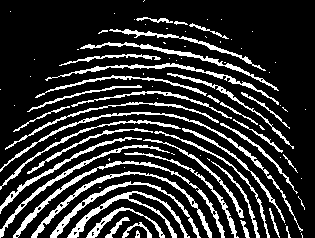


Ellipse #2 :



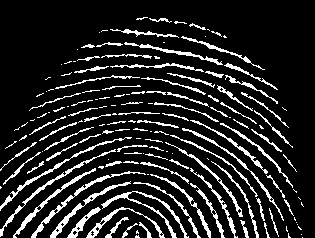


Cross #2 :



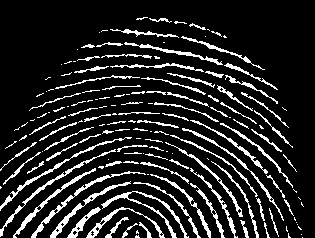


Ellipse #3 :



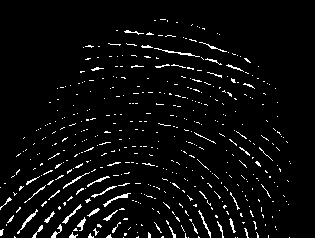


Cross #3 :



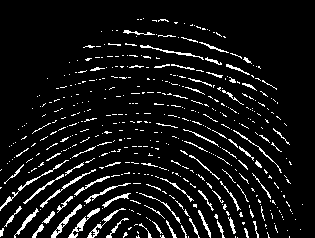


Ellipse #4 :



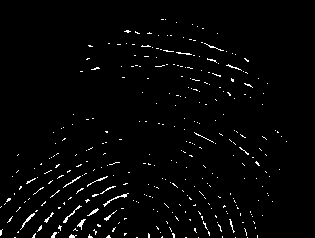


Cross #4 :



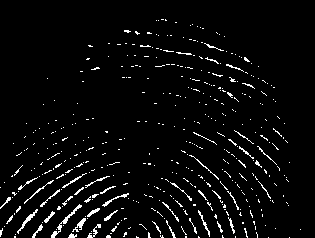

In [0]:
#printing the resulting images
for i in range(4):
    print("\nEllipse #"+str(i + 1),":\n")
    cv2_imshow(erosionsFPEllipse[i])

    print("\nCross #"+str(i + 1),":\n")
    cv2_imshow(erosionsFPCross[i])

There are more iterations in the convolution of a smaller kernel and therefore it is apparent that the smaller 3x3 kernel has the most effective noise removal results. A kernel smaller than 3x3 can be be inaccurate and computationally expensive as well. Hence, 3x3 is the best kernel size for the above fingerprint image.

Ellipse and cross structuring objects have almost the same noise removal effectiveness but when in thorough visual comparison, there are few, tiny holes observed in the edges of the cross eroded fingerprint image. Hence, ellipse is chosen best to avoid minor loss of data.

**Best chosen: Ellipse 3x3**



---
# 2: Morphology to fill broken text

## Reading the original image

Broken Text:



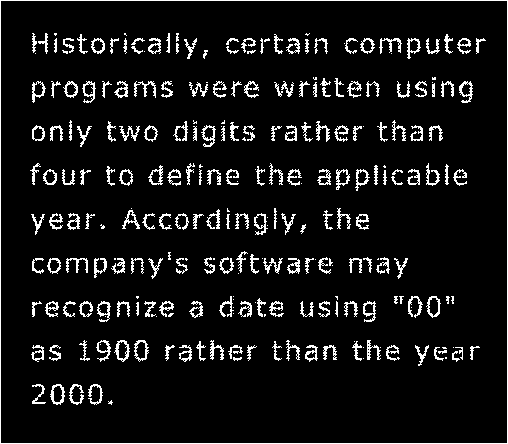

In [0]:
brokenText = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 10/Lab 10_BSCS7AB/broken_text.tif", 0)
print("Broken Text:\n")
cv2_imshow(brokenText)

## Applying dilation on the broken text image

In [0]:
"""
    The objective of the morphological operation is to remove the holes/breakages
    obsevrved within the characters/alphabets of the text

    The fucntion to be used here is:
    cv2.dilate(image, kernel, iterations)

    For the above broken text image, the rectangle for the block-style text 
    and ellipse element seem suitable. I will test both.

    Again, I will store the results of operations with different objects and sizes
    and choose the best
"""

#arrays to store the results with kernels of different size
dilationsBTRectangle = []
dilationsBTEllipse = []

#performing and storing the results of dilations
for i in range(4):
    dilationsBTRectangle.append( cv2.dilate(brokenText, rectangleKernels[i], iterations = 1) )
    dilationsBTEllipse.append( cv2.dilate(brokenText, ellipseKernels[i], iterations = 1) )

print("results stored")

results stored


## Displaying the results


Rectangle #1 :



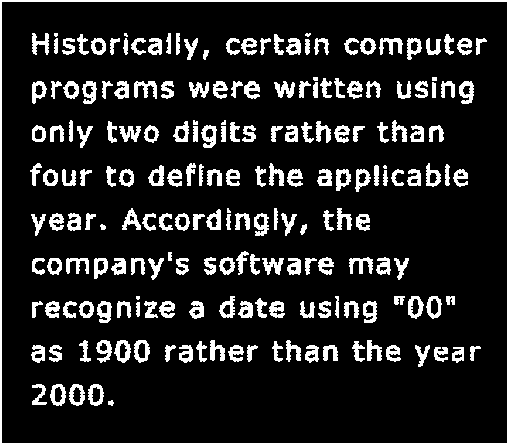


Ellipse #1 :



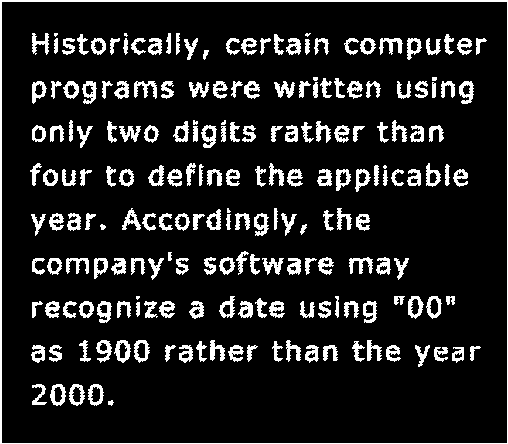


Rectangle #2 :



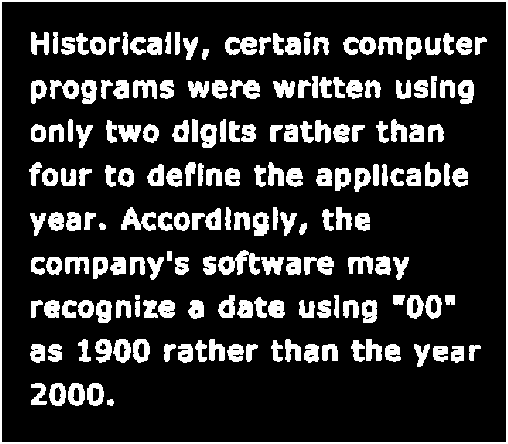


Ellipse #2 :



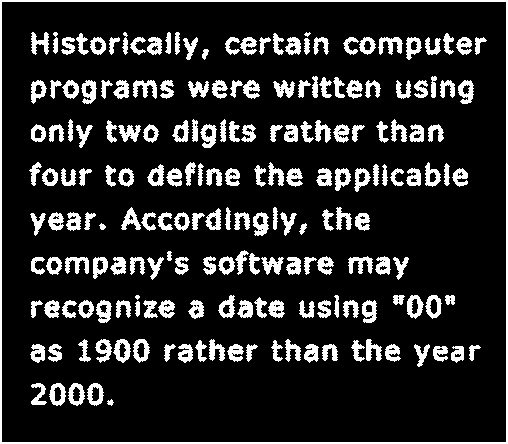


Rectangle #3 :



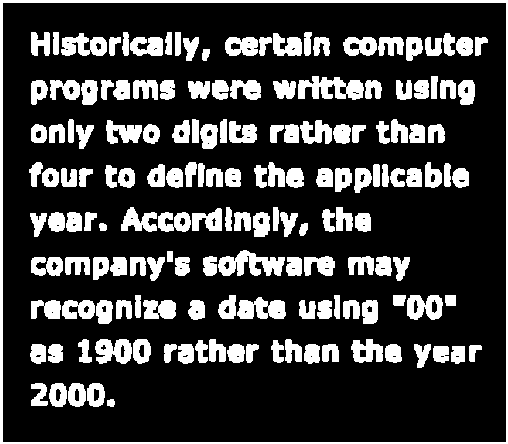


Ellipse #3 :



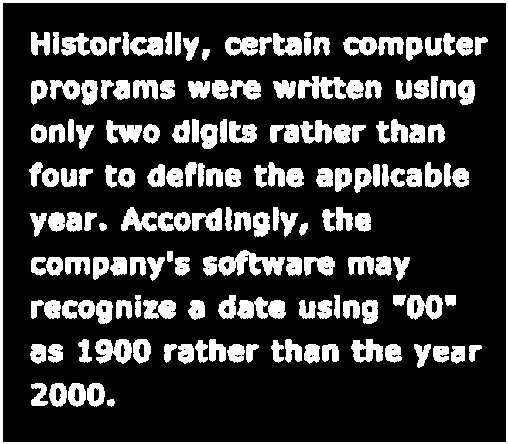


Rectangle #4 :



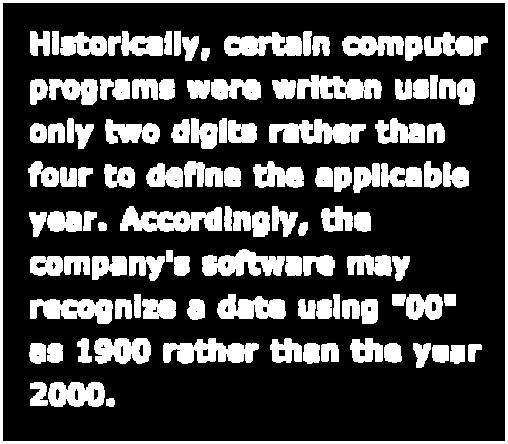


Ellipse #4 :



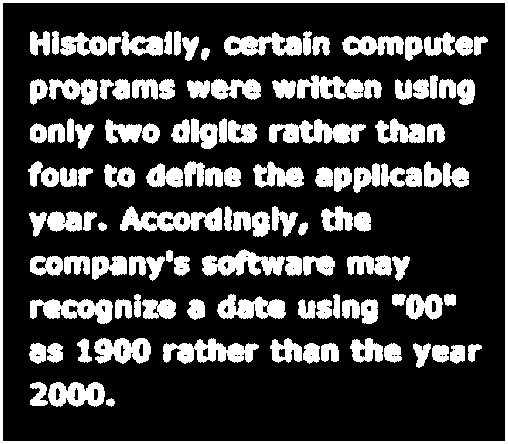

In [0]:
#printing the resulting images
for i in range(4):
    print("\nRectangle #"+str(i + 1),":\n")
    cv2_imshow(dilationsBTRectangle[i])

    print("\nEllipse #"+str(i + 1),":\n")
    cv2_imshow(dilationsBTEllipse[i])

Here, it is observed again that kernel of smaller size was more effective as dilation with kernels of larger size overexpanded the boundaries of the text in the foreground. But kernel 2x2 underperformed again and therefore kernel 3x3 is the best compomise.

With respect to the structuring objects, the rectangle 3x3 left fewer breakages undilated than the ellipse 3x3.

**Best chosen: Rectangle 3x3**

# 3: Morphological operations on grayscale image

## Reading the grayscale image

Grayscale example image:



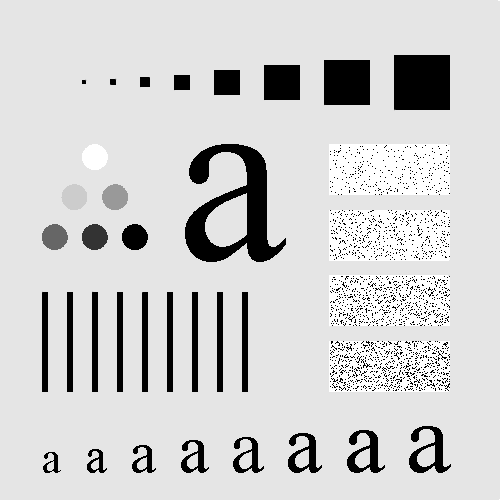

In [0]:
example = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 10/Lab 10_BSCS7AB/Fig01.tif", 0)
print("Grayscale example image:\n")
cv2_imshow(example)

## Applying dilation and erosion

In [0]:
"""
    cv2.dilate(image,kernel,iterataions)
    cv2.erode(image,kernel,iterations)

    For the grayscale image, I will perform dilation and erosion using rectangle,
    ellipse and cross structures with kernel size 3x3
"""

#arrays to store the results of the dilation and erosion operations
dilationGI = []
erosionGI = []

#storing the results of the dilation operations
dilationGI.append( cv2.dilate(example, rectangleKernels[1], iterations = 1) )
dilationGI.append( cv2.dilate(example, ellipseKernels[1], iterations = 1) )
dilationGI.append( cv2.dilate(example, crossKernels[1], iterations = 1) )

#storing the results of the erosion operations
erosionGI.append( cv2.erode(example, rectangleKernels[1], iterations = 1) )
erosionGI.append( cv2.erode(example, ellipseKernels[1], iterations = 1) )
erosionGI.append( cv2.erode(example, crossKernels[1], iterations = 1) )

print("Results stored")

Results stored


## Displaying the results

Rectangle

Dilation:



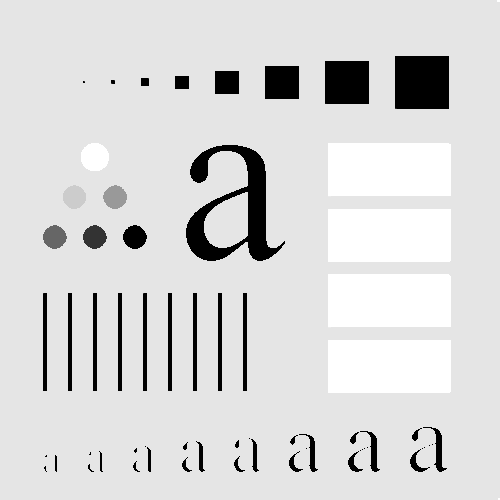


Erosion:




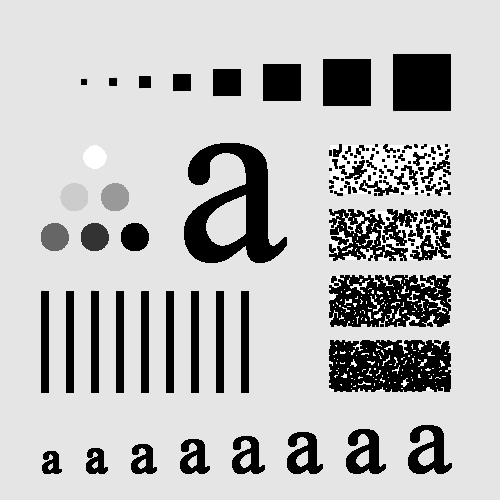



Ellipse

Dilation:



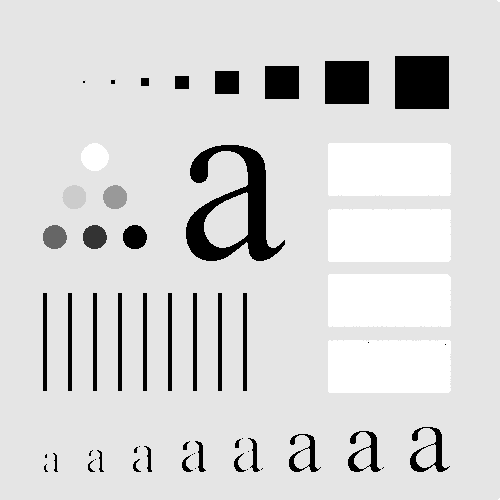


Erosion:



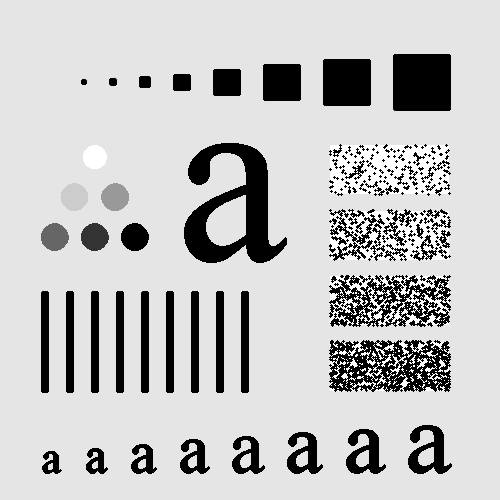



Cross

Dilation:



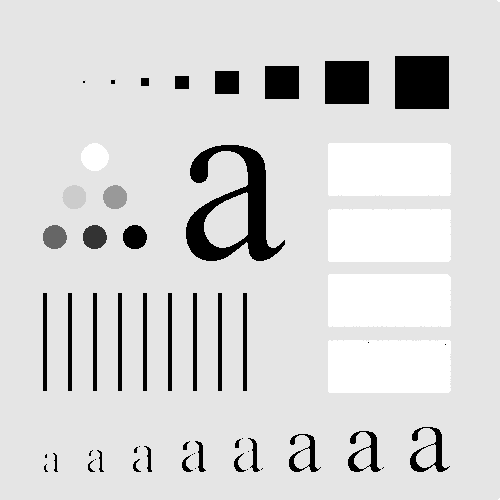


Erosion:



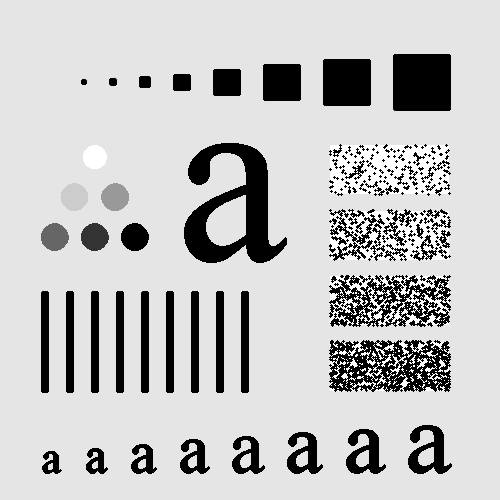

In [0]:
#rectangle
print("Rectangle\n\nDilation:\n")
cv2_imshow(dilationGI[0])
print("\nErosion:\n\n")
cv2_imshow(erosionGI[0])

#ellipse
print("\n\nEllipse\n\nDilation:\n")
cv2_imshow(dilationGI[1])
print("\nErosion:\n")
cv2_imshow(erosionGI[1])

#cross
print("\n\nCross\n\nDilation:\n")
cv2_imshow(dilationGI[2])
print("\nErosion:\n")
cv2_imshow(erosionGI[2])

# 4: Morphology to segment objects in an image

## Reading the objects image

Objects image:



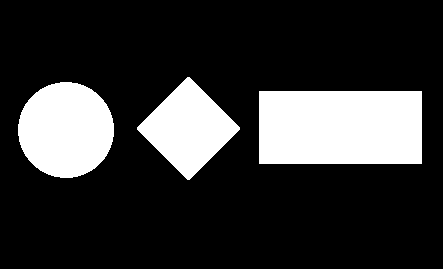

In [0]:
objectsImage = cv2.imread("/content/drive/My Drive/Ramis/Academics/Semester 6/Digital Image Processing/Labs/Lab 10/Lab 10_BSCS7AB/Objects.png", 0)
print("Objects image:\n")
cv2_imshow(objectsImage)

## Methodology

The idea here is to use a kernel of a very large size to segment its matching structuring object. cv2 default structuring objects are cross, rectangle and ellipse. I will try morphological opening (erosion then dilation) with different kernel sizes to find the minimum value that segments the required object.

Diamond is not a structuring element provided by cv2. I am using skimage.morphology.diamond function returning a diamond element kernel.

In [0]:
#different kernel sizes
sizes = [30,50,70,90]

## Segmenting the rectangle


Kernel size 30x30 :



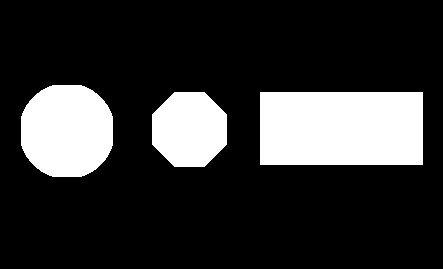


Kernel size 50x50 :



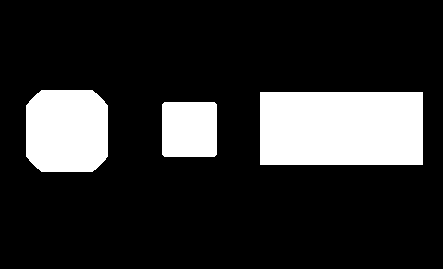


Kernel size 70x70 :



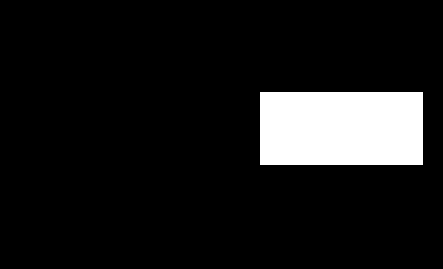


Kernel size 90x90 :



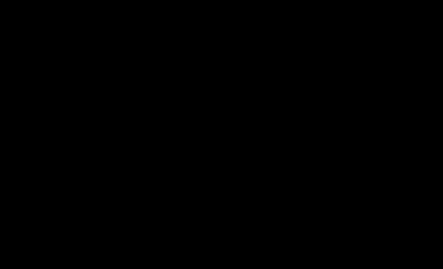

In [0]:
#applying rectangle opening operation on the image

for i in sizes:
    rectangleOpen = cv2.morphologyEx( objectsImage, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (i,i)) )
    print("\nKernel size", str(i)+"x"+str(i), ":\n")
    cv2_imshow(rectangleOpen)

## Segmenting the disc


Kernel size 30x30 :



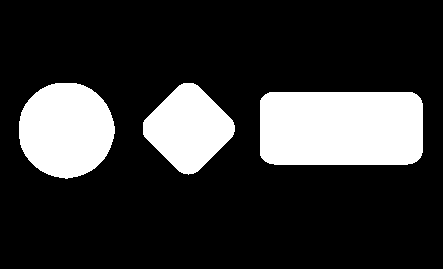


Kernel size 50x50 :



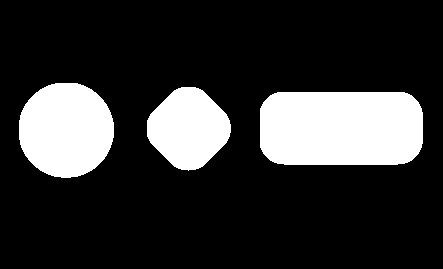


Kernel size 70x70 :



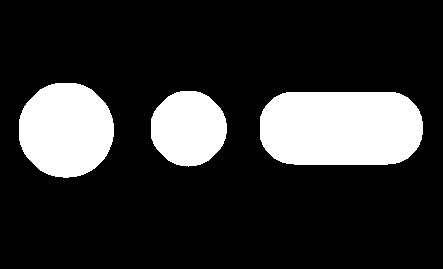


Kernel size 90x90 :



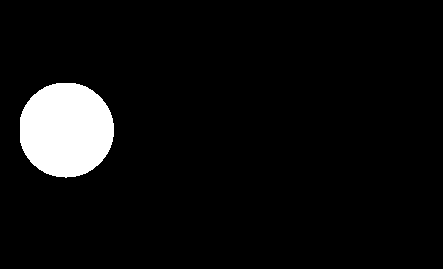

In [0]:
#applying ellipse opening operation on the image

for i in sizes:
    ellipseOpen = cv2.morphologyEx( objectsImage, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i)) )
    print("\nKernel size", str(i)+"x"+str(i), ":\n")
    cv2_imshow(ellipseOpen)

## Segmenting the diamond


Kernel size 20x20 :



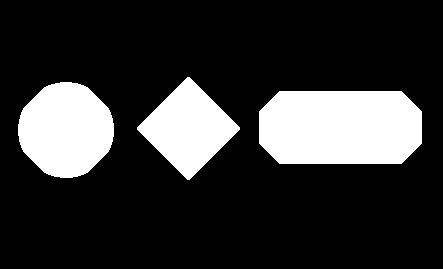


Kernel size 30x30 :



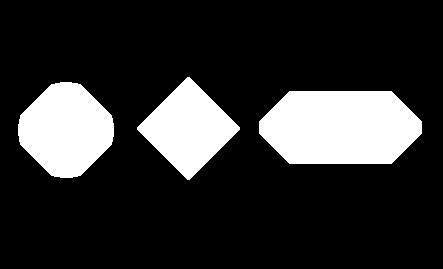


Kernel size 40x40 :



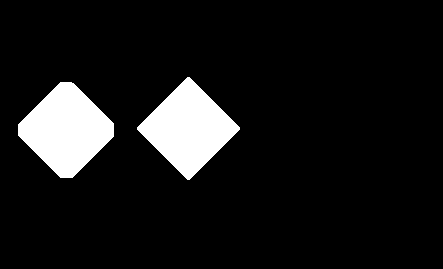


Kernel size 50x50 :



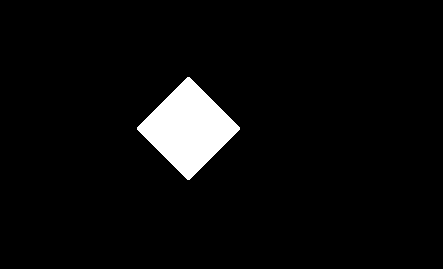

In [0]:
"""
    cv2 does not have a built-in disc structuring element property or function.
    For disc, the skimage.morphology library provides the disc kernel function,
        skimage.morphology.diamond(radius, dtype='numpy.uint8') 
"""

#different sizes tried for diamond as it is smaller and from another module
sizes = [20,30,40,50]

for i in sizes:
    #skimage.morphology.diamond(radius,dtype)
    kernel = diamond(i, dtype="uint8")
    diamondOpen = cv2.morphologyEx( objectsImage, cv2.MORPH_OPEN, kernel)
    print("\nKernel size", str(i)+"x"+str(i), ":\n")
    cv2_imshow(diamondOpen)